(15,)


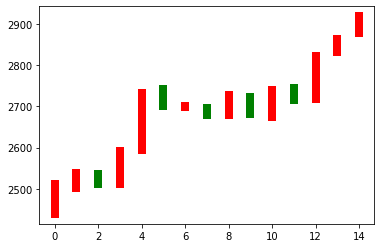

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
date = np.linspace(1,15,15)
print(date.shape)
#(15)
endPrice = np.array([2511.90,2538.26,2510.68,2591.66,2732.98,2701.69,2701.29,
                     2678.67,2726.50,2681.50,2739.17,2715.07,2823.58,2864.90,2919.08])
beginPrice = np.array([2438.71,2500.88,2534.95,2512.52,2594.04,2743.26,2697.47,
                       2695.24,2678.23,2722.13,2674.93,2744.13,2717.46,2832.73,2877.40])
#plt.figure()
for i in range(0,15):
    dateOne = np.zeros([2])
    dateOne[0] = i;
    dateOne[1] = i;
    priceOne = np.zeros([2])
    priceOne[0] = beginPrice[i]
    priceOne[1] = endPrice[i]
    if endPrice[i]>beginPrice[i]:
        plt.plot(dateOne,priceOne,'r',lw=8) 
    else:
        plt.plot(dateOne,priceOne,'g',lw=8)



In [8]:
# date 0-1 price 0-1
dateNormal = np.zeros([15,1])
priceNormal = np.zeros([15,1])
for i in range(0,15):
    dateNormal[i,0] = i/14.0
    priceNormal[i,0] = beginPrice[i]/3000;
x = tf.Variable([15,1], tf.float32)
y = tf.Variable([15,1], tf.float32)

w1 = tf.Variable(tf.random.uniform([1,10],0,1))
b1 = tf.Variable(tf.zeros([1,10]))


In [72]:
from tensorflow import keras
vocab_size = 10000

model = keras.Sequential()
model.add(keras.layers.Dense(10, activation='relu', input_shape=[15])) # activation：设置层的激活函数
model.add(keras.layers.Dense(15, activation='relu'))

model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 10)                160       
_________________________________________________________________
dense_29 (Dense)             (None, 15)                165       
Total params: 325
Trainable params: 325
Non-trainable params: 0
_________________________________________________________________


In [73]:
endPrice = endPrice.reshape((1, 15))
print(endPrice)
print(endPrice.shape)

[[2511.9  2538.26 2510.68 2591.66 2732.98 2701.69 2701.29 2678.67 2726.5
  2681.5  2739.17 2715.07 2823.58 2864.9  2919.08]]
(1, 15)


In [74]:
model.compile(optimizer='adam',
              loss='mse')

In [75]:
example_result = model.predict(endPrice)
example_result

array([[ 454.8629,  534.7012,    0.    , 1459.7332, 2178.4644,    0.    ,
        1735.5051,    0.    ,    0.    , 4343.569 , 5480.0684,    0.    ,
           0.    ,    0.    , 1698.1208]], dtype=float32)